In [1]:
#!pip install seaborn

In [2]:
#!pip install openpyxl

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy                 as np
import geopandas             as gpd
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
#%matplotlib inline
sns.set()

# Carga geojson

In [13]:
# file_path= 'D:/JUAN CAMILO/DS4A/Proyecto FInal/locashp/Loca.shp'
# file_path2='D:/JUAN CAMILO/DS4A/Proyecto FInal/df_SITP.xlsx'

filepath_Localidades = '../Mapas/poligonos-localidades.shp'
filepath_SITP = '../Datasets Clean/df_SITP_clean.csv'

In [5]:
MapaLocalidades = gpd.read_file(filepath_Localidades)
MapaLocalidades

,Nombre_de_l,Acto_admini,Area_de_la_,Identificad,geometry
0,SANTA FE,Acuerdo 117 de 2003,"45170645,863322",03,"POLYGON ((-73.99446 4.61425, -73.99446 4.61425..."
1,BARRIOS UNIDOS,Acuerdo 8 de 1977,"11903448,204872",12,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
2,FONTIBON,Acuerdo 8 de 1977,"33281002,494914",09,"POLYGON ((-74.10342 4.65351, -74.10750 4.64823..."
3,ENGATIVA,Acuerdo 8 de 1977,"35880967,349154",10,"POLYGON ((-74.15547 4.71798, -74.15547 4.71798..."
4,CANDELARIA,Acuerdo 117 de 2003,"2060242,920452",17,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
5,CHAPINERO,Acuerdo 8 de 1977,"38155857,205938",02,"POLYGON ((-74.01089 4.66358, -74.01104 4.66359..."
6,CIUDAD BOLIVAR,Acuerdo 14 de 1983,"130002593,080624",19,"POLYGON ((-74.18135 4.58892, -74.18162 4.58944..."
7,SUBA,Acuerdo 8 de 1977,"100560477,718254",11,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
8,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,"13834084,806513",18,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
9,KENNEDY,Acuerdo 8 de 1977,"38589733,814235",08,"POLYGON ((-74.11830 4.63741, -74.11845 4.63727..."


In [6]:
dic_Localidades={'TEUSAQUILLO':'Teusaquillo',
                'USAQUEN':'Usaquén',
                'CHAPINERO':'Chapinero',
                'SANTA FE':'Santa Fe',
                'SAN CRISTOBAL':'San Cristobal',
                'USME':'Usme',
                'TUNJUELITO':'Tunjuelito',
                'BOSA':'Bosa',
                'KENNEDY':'Kennedy',
                'FONTIBON':'Fontibón',
                'ENGATIVA':'Engativá',
                'SUBA':'Suba',
                'BARRIOS UNIDOS':'Barrios Unidos',
                'TEUSAQUILLO':'Teusaquillo',
                'LOS MARTIRES':'Los Mártires',
                'ANTONIO NARIÑO':'Antonio Nariño',
                'ANTONIO NARIÃO':'Antonio Nariño', 
                'PUENTE ARANDA':'Puente Aranda',
                'CANDELARIA':'La Candelaria',
                'RAFAEL URIBE URIBE':'Rafael Uribe Uribe',
                'CIUDAD BOLIVAR':'Ciudad Bolivar',
                 'SUMAPAZ':'Sumapaz'
}

In [7]:
Colsdict = {'Nombre_de_l' : 'Localidad', 'Acto_admini' : 'Acto_Administrativo',
            'Area_de_la_' : 'Area', 'Identificad' : 'ID_Number'}

MapaLocalidades.rename(columns=Colsdict,inplace = True)

MapaLocalidades['Localidad']=MapaLocalidades['Localidad'].replace(dic_Localidades)
#MapaLocalidades['geometry2']=MapaLocalidades['geometry']
MapaLocalidades

,Localidad,Acto_Administrativo,Area,ID_Number,geometry
0,Santa Fe,Acuerdo 117 de 2003,"45170645,863322",03,"POLYGON ((-73.99446 4.61425, -73.99446 4.61425..."
1,Barrios Unidos,Acuerdo 8 de 1977,"11903448,204872",12,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
2,Fontibón,Acuerdo 8 de 1977,"33281002,494914",09,"POLYGON ((-74.10342 4.65351, -74.10750 4.64823..."
3,Engativá,Acuerdo 8 de 1977,"35880967,349154",10,"POLYGON ((-74.15547 4.71798, -74.15547 4.71798..."
4,La Candelaria,Acuerdo 117 de 2003,"2060242,920452",17,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
5,Chapinero,Acuerdo 8 de 1977,"38155857,205938",02,"POLYGON ((-74.01089 4.66358, -74.01104 4.66359..."
6,Ciudad Bolivar,Acuerdo 14 de 1983,"130002593,080624",19,"POLYGON ((-74.18135 4.58892, -74.18162 4.58944..."
7,Suba,Acuerdo 8 de 1977,"100560477,718254",11,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
8,Rafael Uribe Uribe,Acuerdo 117 de 2003,"13834084,806513",18,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
9,Kennedy,Acuerdo 8 de 1977,"38589733,814235",08,"POLYGON ((-74.11830 4.63741, -74.11845 4.63727..."


<AxesSubplot:>

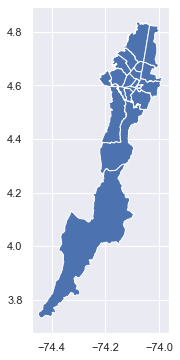

In [8]:
MapaLocalidades.plot(figsize=(12,6))

# Carga base SITP

In [16]:
#df_SITP = pd.read_excel(filepath_SITP)
df_SITP = pd.read_csv(filepath_SITP, usecols=range(1,17))
df_SITP.head()

,Shape *,OBJECTID_1,objectid,cenefa_par,mdoulo_par,zona_parad,nombre_par,direccion_,localidad_,consola_pa,panel_para,audio_para,Latitud,Longitud,Nombre_Localidad,Nombre_Zona
0,Point,1,57288,001A00,A,0,C.C. Iserra 100,AC 100 - KR 54,12,AC 100 - KR 54 (001A00),AC 100 - KR 54,Avenida Calle 100 Carrera 54,4.688481,-74.063971,Barrios Unidos,0
1,Point,2,57289,001A01,A,1,Br. Rincón del Chicó,AC 100 - KR 13,1,AC 100 - KR 13 (001A01),AC 100 - KR 13,Avenida Calle 100 Carrera 13,4.684091,-74.045914,Usaquén,1
2,Point,3,57290,001A02,A,2,Gimnasio Iragua,AV. Boyacá - AC 170,11,AV. Boyacá - AC 170 (001A02),AV. Boyacá - AC 170,Avenida Boyacá Avenida Calle 170,4.759867,-74.066350,Suba,2
3,Point,4,57291,001A03,A,3,Br. Julio Flórez,AC 100 - KR 66A,11,AC 100 - KR 66A (001A03),AC 100 - KR 66A,Avenida Calle 100 Carrera 66 A,4.689504,-74.071439,Suba,3
4,Point,5,57292,001A04,A,4,Avenida Calle 80,AK 68 - CL 79D,12,AK 68 - CL 79D (001A04),AK 68 - CL 79D,Avenida Carrera 68 Calle 79 D,4.682626,-74.080392,Barrios Unidos,4


In [17]:
df_SITP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Shape *           7608 non-null   object 
 1   OBJECTID_1        7608 non-null   int64  
 2   objectid          7608 non-null   int64  
 3   cenefa_par        7608 non-null   object 
 4   mdoulo_par        7608 non-null   object 
 5   zona_parad        7608 non-null   int64  
 6   nombre_par        7608 non-null   object 
 7   direccion_        7608 non-null   object 
 8   localidad_        7608 non-null   int64  
 9   consola_pa        7608 non-null   object 
 10  panel_para        7608 non-null   object 
 11  audio_para        7608 non-null   object 
 12  Latitud           7608 non-null   float64
 13  Longitud          7608 non-null   float64
 14  Nombre_Localidad  7608 non-null   object 
 15  Nombre_Zona       7608 non-null   int64  
dtypes: float64(2), int64(5), object(9)
memory 

In [24]:
df_SITP.isna().any().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Shape *             False
OBJECTID_1          False
objectid            False
cenefa_par          False
mdoulo_par          False
zona_parad          False
nombre_par          False
direccion_          False
localidad_          False
consola_pa          False
panel_para          False
audio_para          False
Latitud             False
Longitud            False
Nombre_Localidad    False
Nombre_Zona         False
dtype: bool>

In [ ]:
#df_SITP.Latitud.value_counts()

In [25]:
gdf = gpd.GeoDataFrame(df_SITP, geometry=gpd.points_from_xy(df_SITP.Longitud, df_SITP.Latitud))
gdf

,Shape *,OBJECTID_1,objectid,cenefa_par,mdoulo_par,zona_parad,nombre_par,direccion_,localidad_,consola_pa,panel_para,audio_para,Latitud,Longitud,Nombre_Localidad,Nombre_Zona,geometry
0,Point,1,57288,001A00,A,0,C.C. Iserra 100,AC 100 - KR 54,12,AC 100 - KR 54 (001A00),AC 100 - KR 54,Avenida Calle 100 Carrera 54,4.688481,-74.063971,Barrios Unidos,0,POINT (-74.06397 4.68848)
1,Point,2,57289,001A01,A,1,Br. Rincón del Chicó,AC 100 - KR 13,1,AC 100 - KR 13 (001A01),AC 100 - KR 13,Avenida Calle 100 Carrera 13,4.684091,-74.045914,Usaquén,1,POINT (-74.04591 4.68409)
2,Point,3,57290,001A02,A,2,Gimnasio Iragua,AV. Boyacá - AC 170,11,AV. Boyacá - AC 170 (001A02),AV. Boyacá - AC 170,Avenida Boyacá Avenida Calle 170,4.759867,-74.066350,Suba,2,POINT (-74.06635 4.75987)
3,Point,4,57291,001A03,A,3,Br. Julio Flórez,AC 100 - KR 66A,11,AC 100 - KR 66A (001A03),AC 100 - KR 66A,Avenida Calle 100 Carrera 66 A,4.689504,-74.071439,Suba,3,POINT (-74.07144 4.68950)
4,Point,5,57292,001A04,A,4,Avenida Calle 80,AK 68 - CL 79D,12,AK 68 - CL 79D (001A04),AK 68 - CL 79D,Avenida Carrera 68 Calle 79 D,4.682626,-74.080392,Barrios Unidos,4,POINT (-74.08039 4.68263)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,Point,7604,64891,PDM-TM,-,0,Plaza de la Democracia,Plaza de la Democracia,0,Plaza de la Democracia (PDM-TM),Plaza de la Democracia,Plaza de la democracia,4.626006,-74.080301,Teusaquillo,0,POINT (-74.08030 4.62601)
7604,Point,7605,64892,QPA-TM,-,0,Quinta Paredes,Quinta Paredes,0,Quinta Paredes (QPA-TM),Quinta Paredes,Quinta paredes,4.637602,-74.093150,Teusaquillo,0,POINT (-74.09315 4.63760)
7605,Point,7606,64893,ROJ-TM,-,0,AV. Rojas,AV. Rojas,0,AV. Rojas (ROJ-TM),AV. Rojas,Avenida Rojas,4.662016,-74.108786,Teusaquillo,0,POINT (-74.10879 4.66202)
7606,Point,7607,64894,SGR-TM,-,0,Salitre el Greco,Salitre el Greco,0,Salitre el Greco (SGR-TM),Salitre el Greco,Salitre el Greco,4.650884,-74.101665,Teusaquillo,0,POINT (-74.10166 4.65088)


In [26]:
baseSITP = gpd.sjoin(gdf,MapaLocalidades[['Localidad','geometry']], how='left', predicate='within')

In [27]:
baseSITP.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7608 entries, 0 to 7607
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Shape *           7608 non-null   object  
 1   OBJECTID_1        7608 non-null   int64   
 2   objectid          7608 non-null   int64   
 3   cenefa_par        7608 non-null   object  
 4   mdoulo_par        7608 non-null   object  
 5   zona_parad        7608 non-null   int64   
 6   nombre_par        7608 non-null   object  
 7   direccion_        7608 non-null   object  
 8   localidad_        7608 non-null   int64   
 9   consola_pa        7608 non-null   object  
 10  panel_para        7608 non-null   object  
 11  audio_para        7608 non-null   object  
 12  Latitud           7608 non-null   float64 
 13  Longitud          7608 non-null   float64 
 14  Nombre_Localidad  7608 non-null   object  
 15  Nombre_Zona       7608 non-null   int64   
 16  geometry        

<AxesSubplot:>

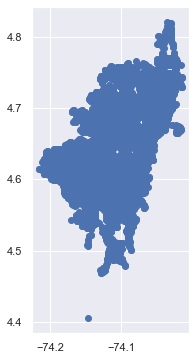

In [29]:
baseSITP.geometry.plot(figsize=(12,6))

In [31]:
SITPLocalidades = pd.DataFrame(baseSITP.drop(columns=['index_right','geometry']))

In [33]:
SITPLocalidades.Localidad.value_counts()

Kennedy               932
Suba                  826
Engativá              775
Usaquén               698
Ciudad Bolivar        570
Bosa                  499
San Cristobal         406
Fontibón              393
Puente Aranda         377
Usme                  328
Chapinero             325
Rafael Uribe Uribe    308
Teusaquillo           272
Barrios Unidos        219
Santa Fe              189
Tunjuelito            185
Los Mártires          166
Antonio Nariño         99
La Candelaria          36
Name: Localidad, dtype: int64

In [34]:
SITPLocalidades.to_csv('../Datasets Clean/SITPLocalidades.csv',index=False)